In [2]:
from lvmtipo.actors import lvm

from plotimg import plot_images
from lvmagp.images import Image


telescope_subsystem_name = "sci"
tss = await lvm.from_string(telescope_subsystem_name).start()

#await tss.foc.moveAbsolute(42)
await tss.pwi.status()

{'is_tracking': True,
 'is_connected': True,
 'is_slewing': False,
 'is_enabled': True,
 'ra_j2000_hours': 18.6160057471836,
 'dec_j2000_degs': 38.785405074932,
 'ra_apparent_hours': 18.6283725065303,
 'dec_apparent_degs': 38.8081266579108,
 'altitude_degs': 54.9499383685226,
 'azimuth_degs': 270.814981974635,
 'field_angle_rate_at_target_degs_per_sec': -0.00259707215957394,
 'field_angle_here_degs': 145.888231785675,
 'field_angle_at_target_degs': 145.88823057396,
 'axis0': {'dist_to_target_arcsec': 0.0316609991944047,
  'is_enabled': True,
  'position_degs': 65.0929766949153,
  'rms_error_arcsec': 0.0513881108454087,
  'servo_error_arcsec': -0.0686440677966102},
 'axis1': {'dist_to_target_arcsec': 0.135063901454829,
  'is_enabled': True,
  'position_degs': 28.692343220339,
  'rms_error_arcsec': 0.0559347278568963,
  'servo_error_arcsec': -0.13728813559322},
 'model': {'filename': '2022-10-25-2223-35stars-8arcsec-rms.pxp',
  'num_points_enabled': 35,
  'num_points_total': 138,
  'rms_

In [ ]:
%matplotlib widget

#await tss.foc.moveAbsolute(f_cal[0])

filenames = (await tss.agc.expose(1)).flatten().unpack("*.filename") 
print(filenames)

plot_images([Image.from_file(f) for f in filenames])


[INFO]: cam: east focus: 34.0 srcs: 87
[INFO]: cam: west focus: 34.0 srcs: 86


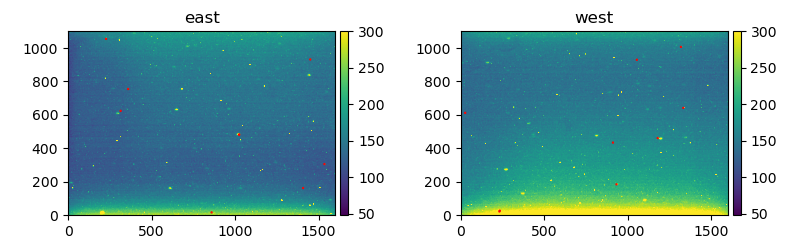

[INFO]: cam: east focus: 35.0 srcs: 85
[INFO]: cam: west focus: 35.0 srcs: 100


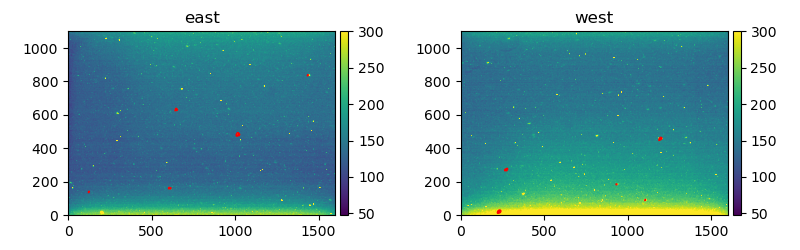

[INFO]: cam: east focus: 36.0 srcs: 73
[INFO]: cam: west focus: 36.0 srcs: 94


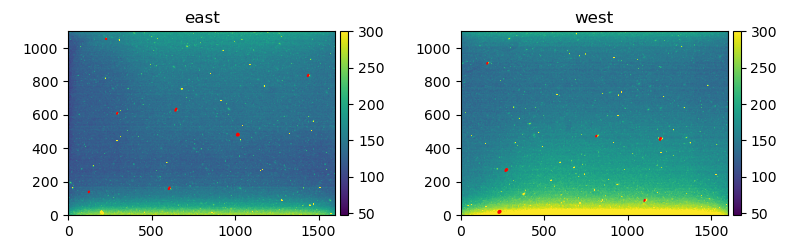

[INFO]: cam: east focus: 37.0 srcs: 83
[INFO]: cam: west focus: 37.0 srcs: 97


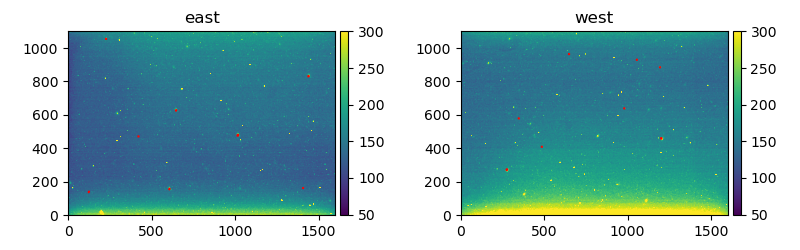

[INFO]: cam: east focus: 38.0 srcs: 88
[INFO]: cam: west focus: 38.0 srcs: 83


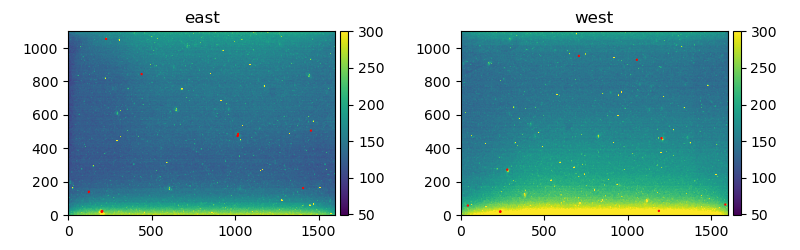

[INFO]: cam: east focus: 39.0 srcs: 84
[INFO]: cam: west focus: 39.0 srcs: 87


In [ ]:
%matplotlib widget

from logging import DEBUG, INFO
from lvmtipo.actors import lvm
from lvmagp.focus import Focus
from lvmagp.images.processors.detection import DaophotSourceDetection, SepSourceDetection

from plotimg import plot_images

source_detection = SepSourceDetection(minarea=4.0, threshold=10.0)
focus = Focus(tss, source_detection = source_detection, radius_column = "fwhm", level = DEBUG)

await tss.pwi.status()

def img_cb(imgs):
   plot_images(imgs, vmax=300)

f_cal, f_err = await focus.fine(guess=37, count=3, step=1, exposure_time=5.0, callback=img_cb)

print(f"(focus, err): {f_cal} {f_err}")


In [ ]:
await tss.agc.reconnect()

In [ ]:
from plotimg import plot_images
from lvmagp.images import Image

print(f_cal[0])
await tss.foc.moveAbsolute(f_cal[0])
filenames = (await tss.agc.expose(1)).flatten().unpack("*.filename") 
print(filenames)
plot_images([Image.from_file(f) for f in filenames])


In [ ]:
%matplotlib widget

from plotimg import plot_images
from lvmagp.images import Image

exptime=0.4

filenames = (await tss.agc.expose(exptime)).flatten().unpack("*.filename") 
print(filenames)
plot_images([Image.from_file(f) for f in filenames])

In [ ]:
from plotimg import plot_images
from lvmagp.images import Image

await lvm.spec.agc.start()
await lvm.spec.agc.reconnect()

In [ ]:
#%matplotlib widget
%matplotlib inline

from IPython.display import clear_output

exptime=5

while True:
   clear_output(wait=True)
   filename = (await lvm.spec.agc.expose(exptime)).flatten().unpack("*.filename") 
   print(filename)
   plot_images([Image.from_file(filename)])


In [ ]:
exptime=4

filename = (await lvm.spec.agc.expose(exptime)).flatten().unpack("*.filename") 
print(filename)
plot_images([Image.from_file(filename)])